In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:

# Removendo espaços em branco na coluna 'owner_type'
df.dropna(subset=['owner_type'], inplace=True)

# Verificando os valores únicos após a remoção dos espaços em branco
unique_values = df['owner_type'].unique()
print(unique_values)

['First Owner' 'Third Owner' 'Second Owner' 'Fifth Owner' 'Fourth Owner']


In [5]:
# Check ID_fuel_type

# Sua coluna de tipos de combustível
owner_types = df['owner_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types)  # contagem de documentos que contêm este tipo de proprietário
    idf[owner_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')


    First Owner: 0.15330038048694186
    Third Owner: 1.3463716944438269
   Second Owner: 0.6163961188864546
    Fifth Owner: 2.530855378554808
   Fourth Owner: 2.1022465501163183


In [6]:
# Check ID_fuel_type

# Sua coluna de tipos de combustível
owner_types = df['owner_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_owner_types = owner_types.drop_duplicates()

for owner_type in unique_owner_types:
    k = sum(owner_type == val for val in owner_types)  # contagem de documentos que contêm este tipo de proprietário
    idf[owner_type] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero

for owner_type, value in idf.items():
    print(f'{owner_type:>15}: {value:>10}')

# Criar nova coluna 'idf' no DataFrame
df['id_owner_type'] = df['owner_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

    First Owner: 0.15330038048694186
    Third Owner: 1.3463716944438269
   Second Owner: 0.6163961188864546
    Fifth Owner: 2.530855378554808
   Fourth Owner: 2.1022465501163183
                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi    

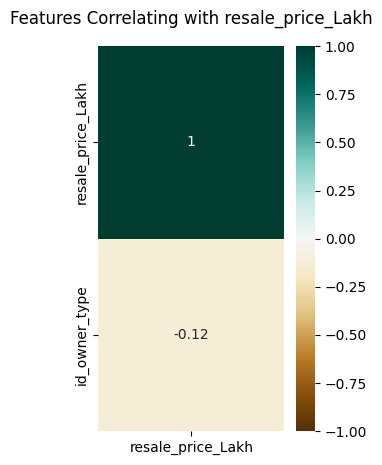

In [7]:
#correlation  

# Select columns
columns_of_interest = ['id_owner_type', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(3, 5))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 12}, pad=16)

plt.show()